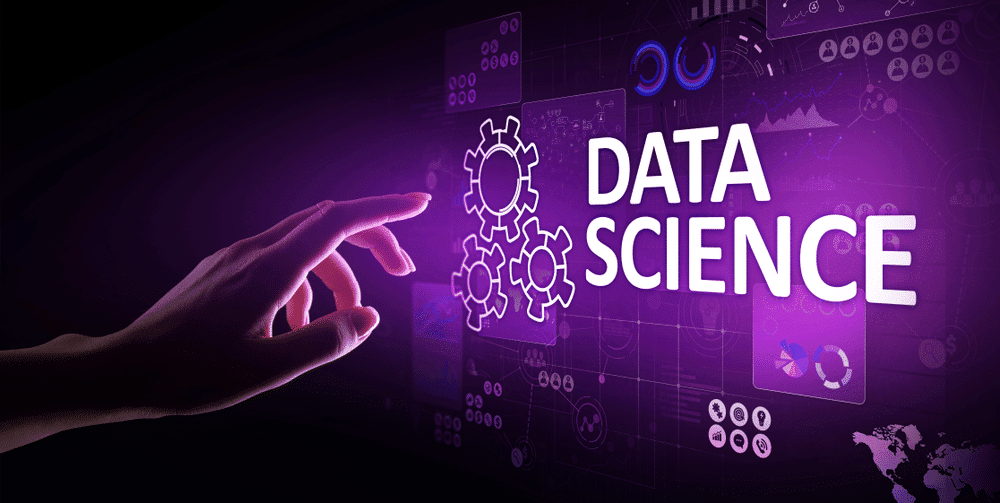

## <h1><center><font color=purple> Problem: Lead Scoring Model</font></center></h1>
Selling something is not an easy task. A business might have many potential customers, commonly referred as leads, but not enough resources to cater them all. Even most of the leads won’t turn into actual bookings. So there is a need for a system that prioritises the leads, and sorts them on the basis of a score, referred to here as lead score. So whenever a new lead is generated, this system analyses the features of the lead and gives it a score that correlates with chances of it being converted into booking. Such ranking of potential customers not only helps in saving time but also helps in increasing the conversion rate by letting the sales team figure out what leads to spend time on.<br>
Here you have a dataset of leads with their set of features and their status. You have to build a ML model that predicts the lead score as an OUTPUT on the basis of the INPUT set of features. This lead score will range from 0-100, so more the lead score means more chances of conversion of lead to WON.<br><br>
NOTE:<br>
1)The leads with STATUS other than ‘WON’ or ‘LOST’ can be dropped during training.<br>
2)Treat all columns as CATEGORICAL columns.<br>
3)This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and could be present in more than one column.<br><br>
Steps should be:<br>
Data Cleaning ( including Feature Selection)
Training ( on Y percent of data)
Testing ( on (100-Y) percent of data)
Evaluate the performance using metrics such as accuracy, precision, recall and F1-score.

## <h1><center><font color=purple> Importing Libraries</font></center></h1>

In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib as npl
from sklearn.feature_selection import RFE
from sklearn.ensemble import BaggingClassifier
# Boosting Classifier Algorithm
from xgboost.sklearn import XGBClassifier
# Stochastic Gradient Descent Classification
from sklearn.linear_model import SGDClassifier

In [650]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
npl.rcParams['figure.figsize']=(16,8)
npl.rcParams['axes.grid']=False

## <h1><center><font color=Purple>Exploratory Data Analysis(EDA)</font></center></h1>

In [651]:
score = pd.read_csv("df.csv")
score = score.drop(['Unnamed: 0'], axis=1)
score

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a

#rearranging Columns
df = df[['Agent_id', 'lost_reason', 'budget', 'lease', 'movein',
       'source', 'source_city', 'source_country', 'utm_source', 'utm_medium',
       'des_city', 'des_country', 'room_type', 'lead_id', 'status']]
df

In [652]:
# Replacing "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0" with np.
score.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,NaN,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,NaN,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca88

In [653]:
# Finding Null Values
score.isnull().sum()

Agent_id              0
status                0
lost_reason        3364
budget             3700
lease              2341
movein            13638
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23547
lead_id               0
dtype: int64

In [654]:
# % Null values in book datasets.

print("Total Percentage of Null lost_reason in dataset:",round((score['lost_reason'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null budget in dataset:",round((score['budget'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null lease in dataset:",round((score['lease'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null movein in dataset:",round((score['movein'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null source in dataset:",round((score['source'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null source_city in dataset:",round((score['source_city'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null source_country in dataset:",round((score['source_country'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null utm_source in dataset:",round((score['utm_source'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null utm_medium in dataset:",round((score['utm_medium'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null des_city in dataset:",round((score['des_city'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null des_country in dataset:",round((score['des_country'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null room_type in dataset:",round((score['room_type'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null lead_id in dataset:",round((score['lead_id'].isnull().sum()/46608 *100),3),'%')
print("Total Percentage of Null status in dataset:",round((score['status'].isnull().sum()/46608 *100),3),'%')

Total Percentage of Null lost_reason in dataset: 7.218 %
Total Percentage of Null budget in dataset: 7.939 %
Total Percentage of Null lease in dataset: 5.023 %
Total Percentage of Null movein in dataset: 29.261 %
Total Percentage of Null source in dataset: 0.0 %
Total Percentage of Null source_city in dataset: 0.0 %
Total Percentage of Null source_country in dataset: 0.0 %
Total Percentage of Null utm_source in dataset: 0.0 %
Total Percentage of Null utm_medium in dataset: 0.0 %
Total Percentage of Null des_city in dataset: 0.0 %
Total Percentage of Null des_country in dataset: 0.0 %
Total Percentage of Null room_type in dataset: 50.521 %
Total Percentage of Null lead_id in dataset: 0.0 %
Total Percentage of Null status in dataset: 0.0 %


Inference:-<br><br>
As we see room type has the most number of null values i.e. 50% followed by Movein at 29%.

In [655]:
# Unique values in each column
print('Agent_id:',len(score["Agent_id"].unique()))
print('lost_reason:',len(score["lost_reason"].unique()))
print('budget:',len(score["budget"].unique()))
print('lease:',len(score["lease"].unique()))
print('movein:',len(score["movein"].unique()))
print('source:',len(score["source"].unique()))
print('source_city:',len(score["source_city"].unique()))
print('source_country:',len(score["source_country"].unique()))
print('utm_source:',len(score["utm_source"].unique()))
print('utm_medium:',len(score["utm_medium"].unique()))
print('des_city:',len(score["des_city"].unique()))
print('des_country:',len(score["des_country"].unique()))
print('room_type:',len(score["room_type"].unique()))
print('lead_id:',len(score["lead_id"].unique()))
print('status:',len(score["status"].unique()))

Agent_id: 120
lost_reason: 31
budget: 1858
lease: 312
movein: 478
source: 683
source_city: 4336
source_country: 186
utm_source: 35
utm_medium: 64
des_city: 220
des_country: 15
room_type: 6
lead_id: 30574
status: 6


In [656]:
# Dropping records other than WON or LOST
score = score.loc[score['status']  != 'OPPORTUNITY']
score = score.loc[score['status']  != 'CONTACTED']
score = score.loc[score['status']  != 'PROCESSING']
score = score.loc[score['status']  != 'IMPORTANT']
score.shape

(46317, 15)

Inferece:-<br><br>
The number of records dropped from 46608 to 46317 after removing unwanted leads

In [657]:
score.status.value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

In [658]:
score.room_type.value_counts()

Ensuite         12379
Studio           6316
Entire Place     4128
Non-Ensuite         2
Twin-Studio         1
Name: room_type, dtype: int64

In [659]:
# Imputing null values in lost_reason with mode of the same
score['lost_reason'] = score['lost_reason'].fillna(score['lost_reason'].mode()[0])
score

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a

In [660]:
score.lost_reason.value_counts()

Low availability                  11965
Not responding                     7827
Not interested                     6449
Low budget                         5505
Wants private accommodation        2781
Short stay                         2264
Not a student                      1518
Just Enquiring                     1263
Inadequate details                  827
Semester stay                       817
Booked with manager                 676
Junk lead                           629
Booked on campus accommodation      613
Supply issue                        538
No supply                           534
Not serving in that region          411
Repeat lead                         394
Booked with competitor              356
Not going to university             329
Distance issue                      219
Junk lead/ Just Enquiring           147
Lead issue                          127
Looking for admission                41
Didn't respond in time               35
Visa/admission denied                17


In [661]:
# Dropping all null values in dataset
score = score.dropna().reset_index(drop=True)
score.shape

(22825, 15)

In [662]:
score = score.drop_duplicates()
score[score.duplicated()] # no dupliactes found

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id


In [663]:
score.budget.value_counts().head(20)

£60 - £120 Per week     9689
£121 - £180 Per Week    8823
£181 - £240 Per Week    2126
£241 - £300 Per week     703
> 300£ Per Week          686
200                       38
150                       36
250                       20
130                       19
160                       17
100                       17
£150 Per Week             16
140                       15
150/week                  15
180                       15
120                       14
£200 Per Week             13
£160 Per Week             12
170                       10
>150/week                  9
Name: budget, dtype: int64

In [664]:
#Keeping only top 5 most occuring budgets
score1 = score.loc[(score['budget'] == '£60 - £120 Per week') | (score['budget'] == '£121 - £180 Per Week') |  
             (score['budget'] == '£181 - £240 Per Week') |(score['budget'] == '£241 - £300 Per week') | 
             (score['budget'] == '> 300£ Per Week')]
score1

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
1,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
2,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...
3,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...
4,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,LOST,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22820,d119aab7bc5c0823d29df1fa368bc56a6f6e333fc680a2...,LOST,Wants private accommodation,£121 - £180 Per Week,Other,19/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
22821,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1a

Inference:-<br><br>
1. As seen on the website, we only found 5 types of budgets we deleted the rest as they lie some where within the given ranges and also it helps to reduce the number of encodings.
2. Also the count of other budgets was fairly low comparitively.

In [665]:
score1.lease.value_counts().head(20)

Full Year Course Stay 40 - 44 weeks           10288
Complete Education Year Stay 50 - 52 weeks     5921
Semester Stay 20 - 24 weeks                    2494
Summer/Short Stay 8 - 12 weeks                 2027
Other                                           862
51 weeks                                        100
51                                               85
44 weeks                                         48
44                                               21
40 - 44 weeks                                    19
1 year                                           15
50 - 52 weeks                                    13
full year stay                                   11
4 weeks                                           5
12 weeks                                          5
20 - 24 weeks                                     5
1 year .                                          4
51 week                                           4
12                                                4
6 months    

Inference:-<br><br>
Similar to the budget, we  classified the lease times into 5 major categories, rest others were considered under the "Other" Category.

In [666]:
# Splitting into first 4 categories
only4 = score1.loc[(score1['lease'] == 'Full Year Course Stay 40 - 44 weeks') | (score1['lease'] == 'Complete Education Year Stay 50 - 52 weeks') |  
             (score1['lease'] == 'Semester Stay 20 - 24 weeks') |(score1['lease'] == 'Summer/Short Stay 8 - 12 weeks')] 
only4

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
2,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,15/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1f8d4925b8e2af054b06d2ec62e202bae9b4ce53caea34...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,350c5ab8ccefe5621715f9f6e56cb234b62cd4eabce310...
3,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,02/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b1d2dad941873eb0d834c6c8f16f32bcbfbb437956f4e1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,2d664bae493ee238f2f4ee17c91d4f8a0a7eaef64c3d58...
4,50750ee66f27656c2b34d43078a064c3b9b8807938b6a3...,LOST,Not responding,£181 - £240 Per Week,Complete Education Year Stay 50 - 52 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,912b4e4c705217bbf4d094839c6e6c2ee7af4328cd9710...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,810c069040f6a9b16fdf976a901755508a87cb0224b169...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...
6,f1ece3b02f1e5989bb0918e468fbc3f3e60d74ed90809d...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,09/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,2cd7b7d56d59bc36ed44f22abb293587e6c7ec3708facc...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,4c354049e888947c11126b053b3bb9b880e2fddc456463...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22819,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low availability,£60 - £120 Per week,Semester Stay 20 - 24 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,42e535be8863a0253115744dca757cddddfc2f626df4f8...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,86ae1d25e92121dd581c75c958103bb3cc81ef4aa47fef...
22821,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a8

In [667]:
only4.lease.value_counts()

Full Year Course Stay 40 - 44 weeks           10288
Complete Education Year Stay 50 - 52 weeks     5921
Semester Stay 20 - 24 weeks                    2494
Summer/Short Stay 8 - 12 weeks                 2027
Name: lease, dtype: int64

In [668]:
# combining rest other categories in lease
other = score1.loc[(score1['lease'] != 'Full Year Course Stay 40 - 44 weeks') & (score1['lease'] != 'Complete Education Year Stay 50 - 52 weeks') &  
             (score1['lease'] != 'Semester Stay 20 - 24 weeks') &(score1['lease'] != 'Summer/Short Stay 8 - 12 weeks')] 
other

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
1,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
5,f1ece3b02f1e5989bb0918e468fbc3f3e60d74ed90809d...,LOST,Wants private accommodation,£60 - £120 Per week,Other,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b384863fa1f6e091164b74219726eee0b9dd47776b91a4...,e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,12a382afc12ec36c5e30b1c95a6093c3f535248f20b701...
17,95d245f3eb25eb695e980c0591c16a4c818e609cd2aac2...,LOST,Just Enquiring,£60 - £120 Per week,Other,06/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,38b85524e5161ad414784edca30dc35b5e422910d15e7a...
33,d4192f06768ab0f257c7f5e17ad021b075b995d4a18675...,LOST,Low budget,£60 - £120 Per week,Other,16/07/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,282f96b099630502f8bb5033849c69982dd14701585306...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ea58dc05b968545d016953b84130933e920097afbf3443...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,0d40ac22649ec447d7c4aa4a430fe13ed8a76b523b8e6e...
39,18177338c3669a1314d644b7f4ecfd18a5c735e819edf1...,LOST,Not interested,£181 - £240 Per Week,51 weeks,04/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,a942ac61e5904001ce2c9276debd89c03a93c0e2f84e78...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1c42ebd1f17c7950d61e4db4bd277d0ec8472f575cad98...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22771,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Low availability,£60 - £120 Per week,Other,17/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9a16d664dd12c980f570d0fdf9d69653975e75e3b733b7...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,3e18100303148b030b7c306581ee852d9a105a6018ae8f...
22778,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Short stay,£60 - £120 Per week,Other,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,42e535be8863a0253115744dca757cddddfc2f626df4f8...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,085c3a49a31cbfa71c36746a98dc908d30d423a63b969c...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,e1c453c3b1a82ce4950877c372da1365f68e1535ed57c3...
22793,25b99b9c636ea2d7820f5409c19248e08e87e59d0fb42c...,LOST,Not responding,£121 - £180 Per Week,Other,20/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1

In [669]:
other["lease"] = "Other"
other.lease.value_counts()

Other    1297
Name: lease, dtype: int64

In [670]:
score_final = pd.concat([only4, other])
score_final = score_final.sample(frac = 1)
score_final

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
8254,ecd8409a7716ba7f20b5ed1c68de689a94636675972d07...,LOST,Short stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,12/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,b426637e0c66d866bb13b4fe711319286ae414f5d332c9...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,1b4e390dcd79bc05931bc4a080340fff0ed6eab8c34760...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,b08421bcb3547903a516c0263bf86ddcffeb3062661ac5...
11567,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Not interested,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9d90c525b45d59b9f6224c4a6dfbf58d059fa40520cb2b...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,2737725ff8bab2313a06f06aa9dcf714fd0c834b5ed6e3...
5737,13990937ab8ca4413751a9012a31255e72a18ba3ac8d5c...,LOST,Low availability,£241 - £300 Per week,Complete Education Year Stay 50 - 52 weeks,19/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9befe19444fef2f1343a1d67db798ab9e43ba95cb8e100...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,be925ce59b6cf49294e0423aade88516442b58760e5ff4...
4841,a9f80b4eaba3fd134bafafe7506e08940201964615f7ee...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,13/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,9267e84edd6b3e8619742d091c493d29a9cc2b54c95b11...
8119,c077ad291c7b691b8defba867c1b937f16e878c1f3bdd5...,WON,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8de56ea436a33fedaf67a191f8300bfa2dea303259e8b5...,a11c1793ab499eb847ccc43dbe32fedae6335d0f71566b...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,2baa70fa96081bf1c4c7319e7af4bed170348d9c6821b4...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,cb573ad51e4c3f1992c1e87f92cfa67e7a44b4f66b0970...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,2fca346db656187102ce806ac732e06a62df0dbb2829e5...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,09/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,06b999839926bef72818cb395ce25bb5729653f1c5e3cb...,c5ef963994081d53520c520b85ca3cafbcd51eaa87c980...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,9edff2628ff7385bffbe7fc9cae89010d2cb9182e805e1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,60a192c3ae5681f19c7d3d14488ff8b811b7ef91debe5c...
15543,d41faf2b02624edbcdc0c13fbed91c96f0f6dc0a8dccb5...,LOST,Not interested,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,25/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,2ab8f487a0ac857ad748f80c87b5c777aba77d50e23cb8...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b07...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a

Inference:-<br><br>
score_final is the final dataset after cleansing and imputation which will be considered for model building. 

## <h1><center><font color=purple>Data Visualizations</font></center></h1>

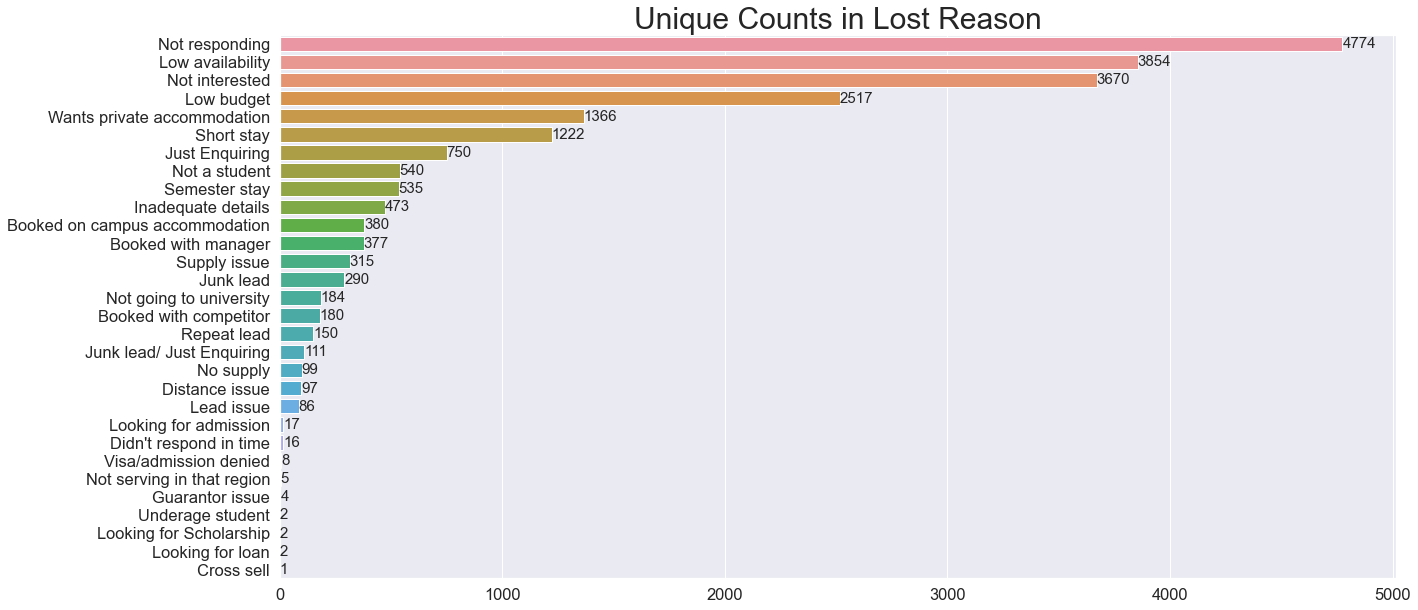

In [671]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=score_final,x=score_final["lost_reason"].value_counts().values,y=score_final["lost_reason"].value_counts().index)
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Unique Counts in Lost Reason",fontsize = 30)
plt.show()

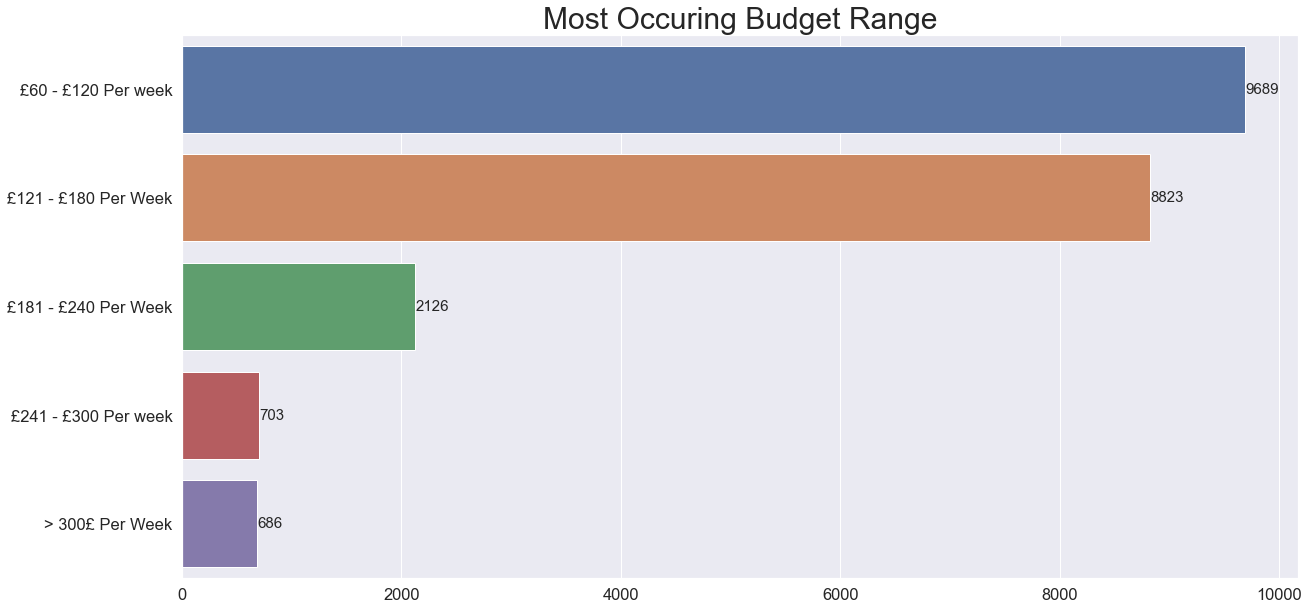

In [672]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=score_final,x=score_final["budget"].value_counts().values,y=score_final["budget"].value_counts().index)
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Most Occuring Budget Range",fontsize = 30)
plt.show()

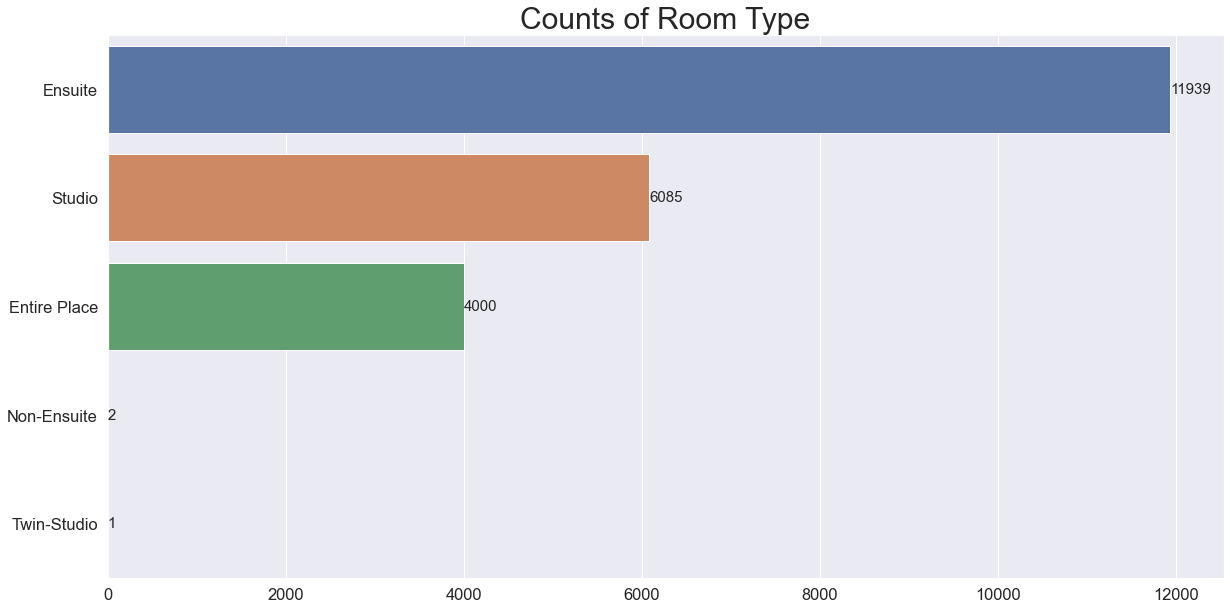

In [673]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=score_final,x=score_final["room_type"].value_counts().values,y=score_final["room_type"].value_counts().index)
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Counts of Room Type",fontsize = 30)
plt.show()

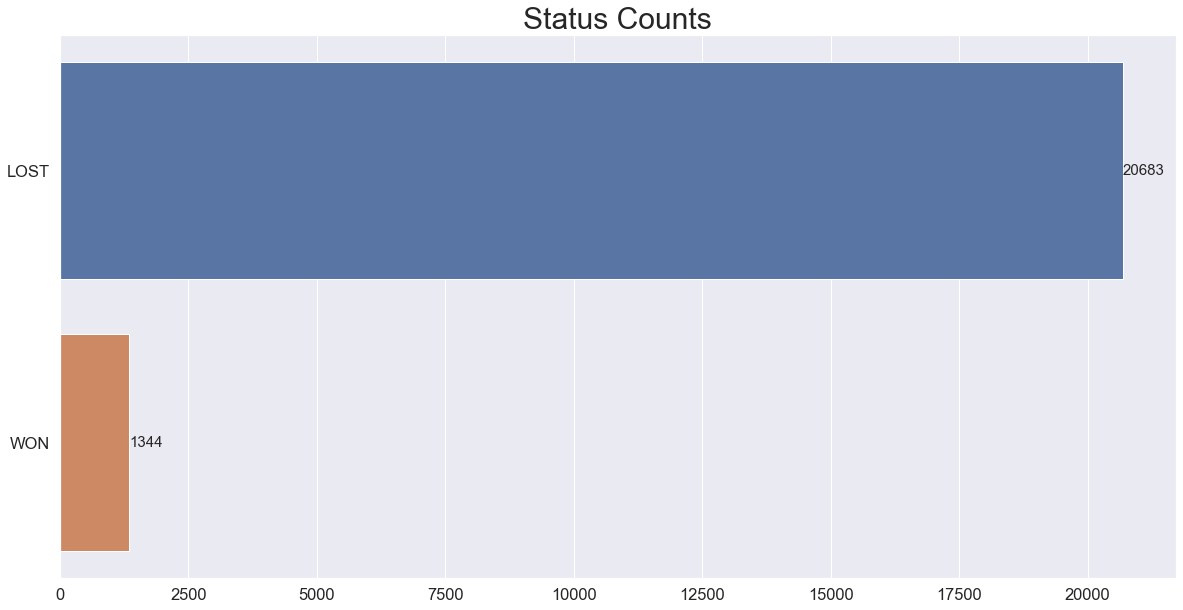

In [674]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
ax = sns.barplot(data=score_final,x=score_final["status"].value_counts().values,y=score_final["status"].value_counts().index)
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Status Counts",fontsize = 30)
plt.show()

## <h1><center><font color=purple>Label Encoding</font></center></h1>

In [675]:
from sklearn.preprocessing import LabelEncoder
score_final["Agent_id"] = LabelEncoder().fit_transform(score_final["Agent_id"])
score_final["lost_reason"] = LabelEncoder().fit_transform(score_final["lost_reason"])
score_final["budget"] = LabelEncoder().fit_transform(score_final["budget"])
score_final["lease"] = LabelEncoder().fit_transform(score_final["lease"])
score_final["movein"] = LabelEncoder().fit_transform(score_final["movein"])
score_final["source"] = LabelEncoder().fit_transform(score_final["source"])
score_final["source_city"] = LabelEncoder().fit_transform(score_final["source_city"])
score_final["source_country"] = LabelEncoder().fit_transform(score_final["source_country"])
score_final["utm_source"] = LabelEncoder().fit_transform(score_final["utm_source"])
score_final["utm_medium"] = LabelEncoder().fit_transform(score_final["utm_medium"])
score_final["des_city"] = LabelEncoder().fit_transform(score_final["des_city"])
score_final["des_country"] = LabelEncoder().fit_transform(score_final["des_country"])
score_final["room_type"] = LabelEncoder().fit_transform(score_final["room_type"])
score_final["lead_id"] = LabelEncoder().fit_transform(score_final["lead_id"])
score_final["status"] = LabelEncoder().fit_transform(score_final["status"])
score_final.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
8254,97,0,25,4,4,152,0,2084,148,9,1,12,1,0,12620
11567,96,0,20,1,1,386,0,1811,148,9,1,7,1,0,2847
5737,6,0,15,3,0,241,0,1793,148,9,1,41,1,0,13598
4841,64,0,21,1,1,164,0,1920,148,9,1,7,1,0,10435
8119,73,1,15,4,0,12,0,1642,104,9,1,14,1,3,14472


In [676]:
# Splitting data into X,Y.
X = score_final.drop(["status"],axis = 1)
Y = score_final["status"]

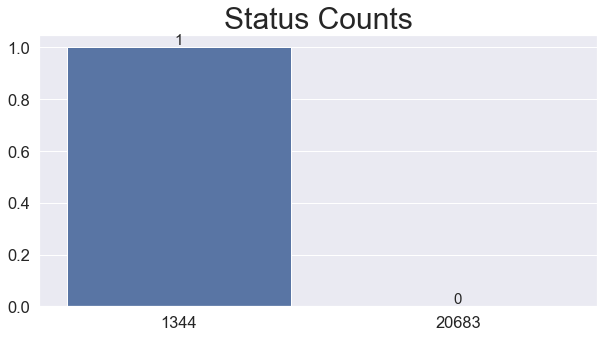

In [677]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.barplot(data=score_final,x=score_final["status"].value_counts().values,y=score_final["status"].value_counts().index)
ax.bar_label(ax.containers[0],fontsize = 15)
plt.title("Status Counts",fontsize = 30)
plt.show()

Inference:- <br><br>
As we can see data is imbalanced from above graph.

In [678]:
# Balancing Data
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X, Y)
pd.Series(y_ros).value_counts()

0    20683
1    20683
Name: status, dtype: int64

Inference:- <br><br>
As we can see now data is balanced.

## <h1><center><font color=Purple>Feature Elimination using Recursive Feature Elimination (RFE)</font></center></h1>

In [679]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,n_features_to_select=5).fit(X, Y)

In [680]:
# Feature Ranking:
fit.ranking_

array([ 7,  1,  2,  1,  6,  1, 10,  8,  1,  3,  5,  1,  4,  9])

In [681]:
X.columns

Index(['Agent_id', 'lost_reason', 'budget', 'lease', 'movein', 'source',
       'source_city', 'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country', 'room_type', 'lead_id'],
      dtype='object')

Inference:-<Br><br>
    Dropping last 5 features rankingwise i.e lead_id, source_city, source_country, agent_id and movein.

In [682]:
score_final = score_final.drop(["lead_id","source_city","source_country","Agent_id","movein"],axis= 1)
score_final 

,status,lost_reason,budget,lease,source,utm_source,utm_medium,des_city,des_country,room_type
8254,0,25,4,4,0,9,1,12,1,0
11567,0,20,1,1,0,9,1,7,1,0
5737,0,15,3,0,0,9,1,41,1,0
4841,0,21,1,1,0,9,1,7,1,0
8119,1,15,4,0,0,9,1,14,1,3
...,...,...,...,...,...,...,...,...,...,...
11817,0,15,4,0,1,9,1,51,1,0
15543,0,20,4,1,1,9,1,33,1,0
4809,0,7,4,0,0,9,1,67,1,0
10143,0,2,0,3,0,9,1,67,1,0


## <h1><center><font color=purple>Splitting Data Into Test & Train</font></center></h1>

In [683]:
X_train, X_test, Y_train, Y_test = train_test_split(score_final, Y, test_size=0.3, random_state=42)

## <h1><center><font color=purple>Model Building</font></center></h1>

In [684]:
# Building Model 
models = [ SGDClassifier, XGBClassifier, BaggingClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC , KNeighborsClassifier, GaussianNB]
accuracy = []
precision = []
recall = []
f1 = []

for model in models:
    Mod = model().fit(X_train,Y_train)
    pred = Mod.predict(X_test)
    accuracy.append(accuracy_score(Y_test, pred))
    precision.append(precision_score(Y_test, pred))
    recall.append(recall_score(Y_test, pred))
    f1.append(f1_score(Y_test, pred))
    
# Create a new DataFrame from the above lists

Models_score = pd.DataFrame({"Models": [ "SGDClassifier", "XGBClassifier", "BaggingClassifier", "LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier", "SVC" , "KNeighborsClassifier", "GaussianNB"],
                           "Accuracy": accuracy,
                           "Precision": precision,
                           "Recall": recall,
                           "F1": f1}).sort_values(by=[ "Accuracy"], ascending=False)

Models_score.set_index('Models', inplace=True)
Models_score

,Accuracy,Precision,Recall,F1
Models,,,,
XGBClassifier,1.000000,1.000000,1.000000,1.000000
BaggingClassifier,1.000000,1.000000,1.000000,1.000000
LogisticRegression,1.000000,1.000000,1.000000,1.000000
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000
GaussianNB,1.000000,1.000000,1.000000,1.000000
SGDClassifier,0.999092,0.997382,0.987047,0.992188
KNeighborsClassifier,0.983961,0.878378,0.841969,0.859788
SVC,0.941595,0.000000,0.000000,0.000000


Inference:-<Br><br>
    As we can see XGBClassifier gives good accuracy score.